# [1주차] Basic Machine Learning(1)
---
## 01) 기본적인 Machine Learning 용어와 개념 설명

### 머신러닝
* 정교한 프로그래밍의 한계
* 정교한 프로그래밍 없이 컴퓨터 스스로 학습해서 배울 수 있는 기술

### Supervised Learning
learning with **labeled examples** (정해져 있는 데이터로 학습) <br/>
Most common problem type in ML
   * Image Labeling
   * Email spam Filter
   * Predicting exam score

    #### Type of Supervised Learning<br/>
    * Regession(회귀)
    * Binary Classification
    * Multi-label Classification


### Unsupervised Learning
**un-labeled data**
   * Google news Grouping
   * Word Clustering
---
## 02 ) Simple Linear Regression

### Regression
종속변수와 독립변수(하나 이상)간의 관계를 예측하는 것

### Linear Regression
데이터를 가장 잘 나타내는 직선의 방정식을 찾는 것

### Hypothesis: H(x) = W(x) + b
가설은 직선의 방정식

###  Goal: Minimize한 cost(W,b)를 찾자!
Cost를 최소화하는 최적의 W,b 구하기

### Cost Function (비용함수)
* Cost는 <span style='color:red'>H(x) - y</span>로 실제 값과 가설 값의 차이
* Error 값을 제곱해서 더한 후 평균을 내는 것이 Cost Function
* Cost는 최소화 되어야 함.
* Cost Minimize 알고리즘 중 Gradient descent(경사하강법)이 많이 쓰임.


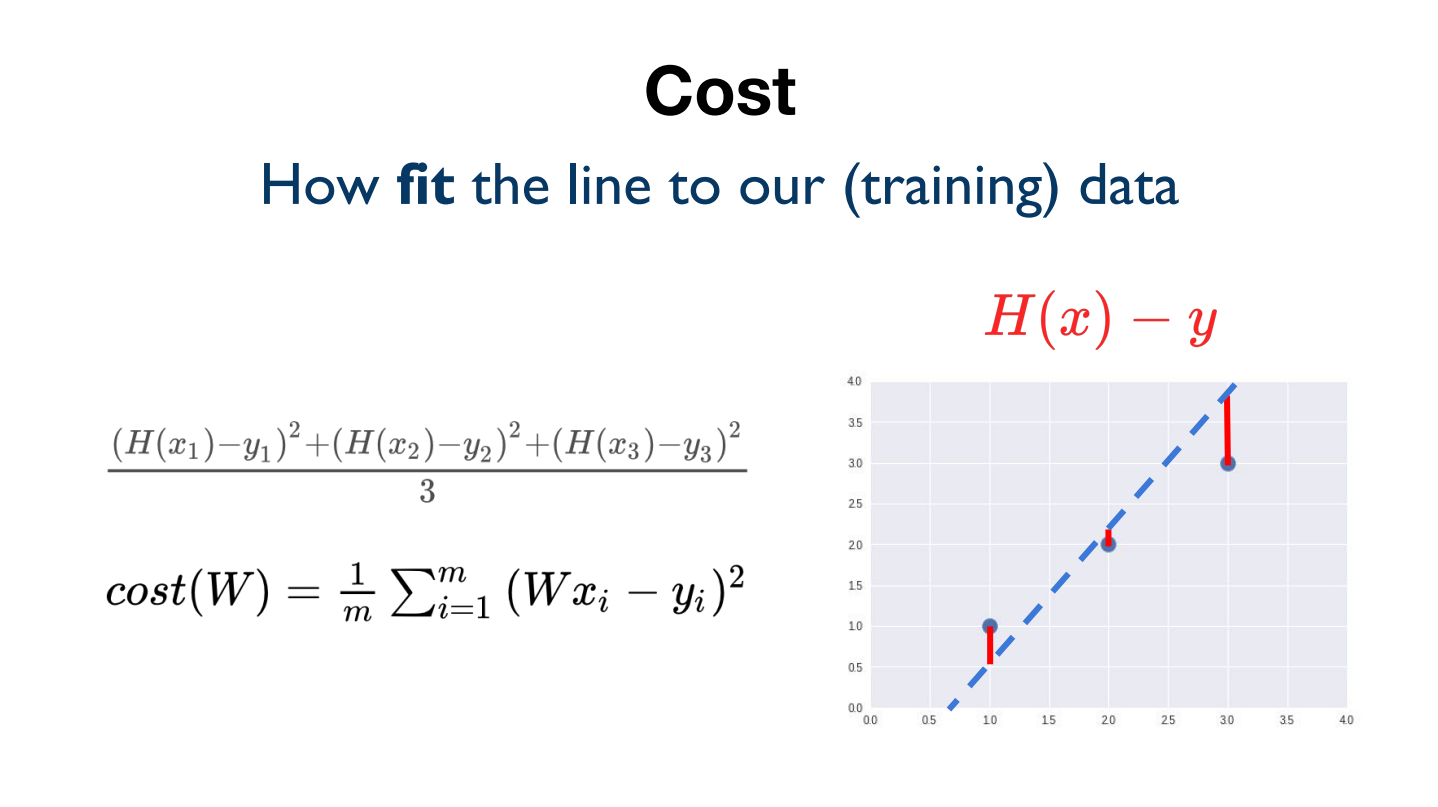

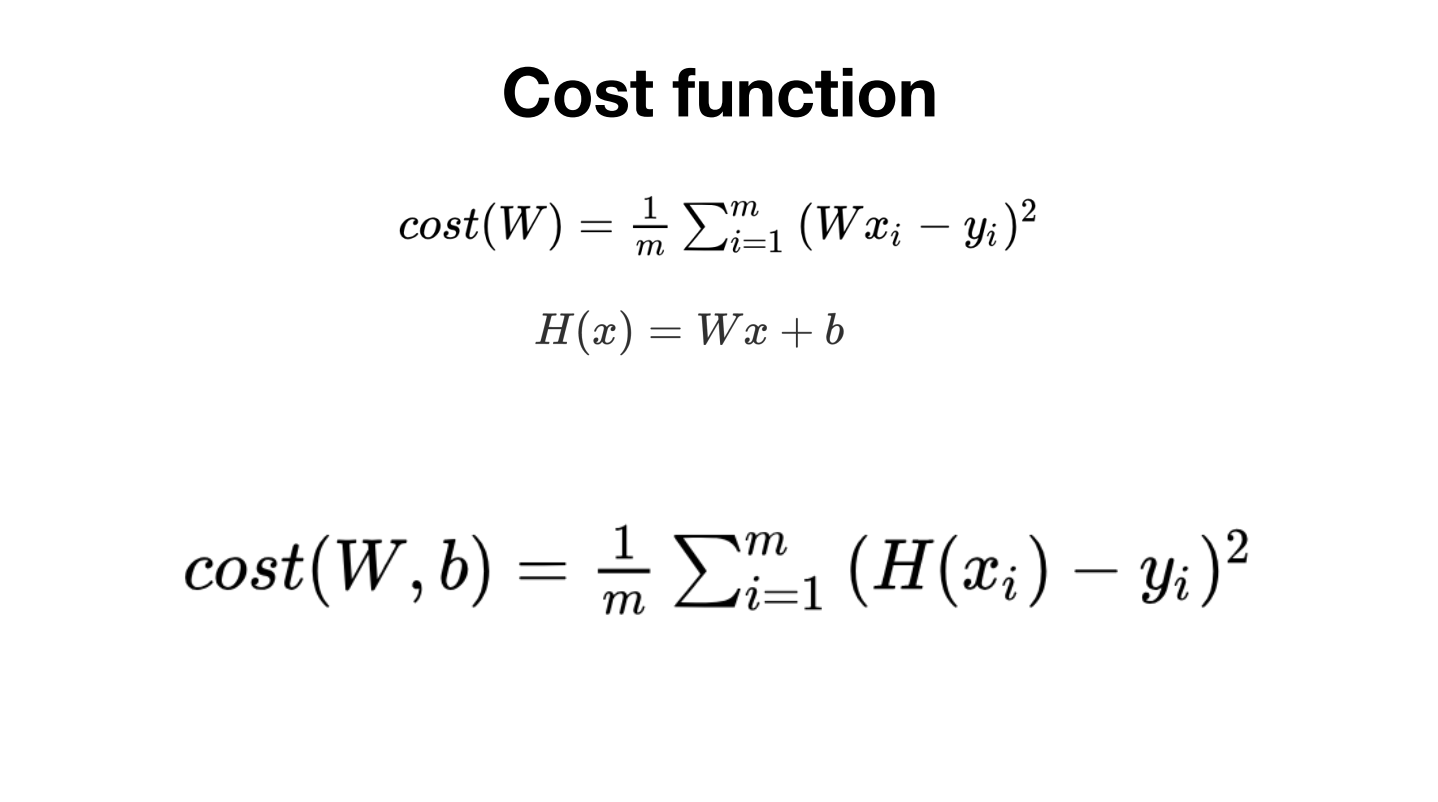

## Build Hypothesis and Cost

### 가설) H(x) = Wx + b

x_data = [1,2,3,4,5]<br/>
y_data = [1,2,3,4,5]

W = tf.Variable(2.9) <br/>
b = tf.Variable(0.5)

hypothesis = W * x_data + b

### 비용) Cost(W,b)

cost = tf.reduce_mean(tf.square(hypothesis - y_data))

---
## Gradient Descent (경사하강법)
* Cost를 최소화하는 W,b를 찾는 것
* 경사(기울기)를 하강하면서 찾아감

In [11]:
# Full Code
import tensorflow as tf
import numpy as np

x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100+1): # W,b 업데이트
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W*x_data+b
        cost = tf.reduce_mean(tf.square(hypothesis-y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)
    if i%10==0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
print()        
print(W * 5 + b)
print(W * 2.5 + b)

    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059
  100|    1.0048|  -0.01733|  0.000055

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)


---
## 03) Linear Regression and How to minimize Cost

### Gradient descent algorithm (경사 하강 알고리즘)
### How it works?
   * 최초에는 추정을 통해 W,b를 정함
   * cost가 줄어드는 방향으로 W,b를 계속해서 업데이트
   * 변수들을 바꿀때마다 기울기 값을 구해 cost(W,b)가 최소화되게 만듦
   * 기울기가 최소점에 도달했다고 판단할때까지 반복
   
   

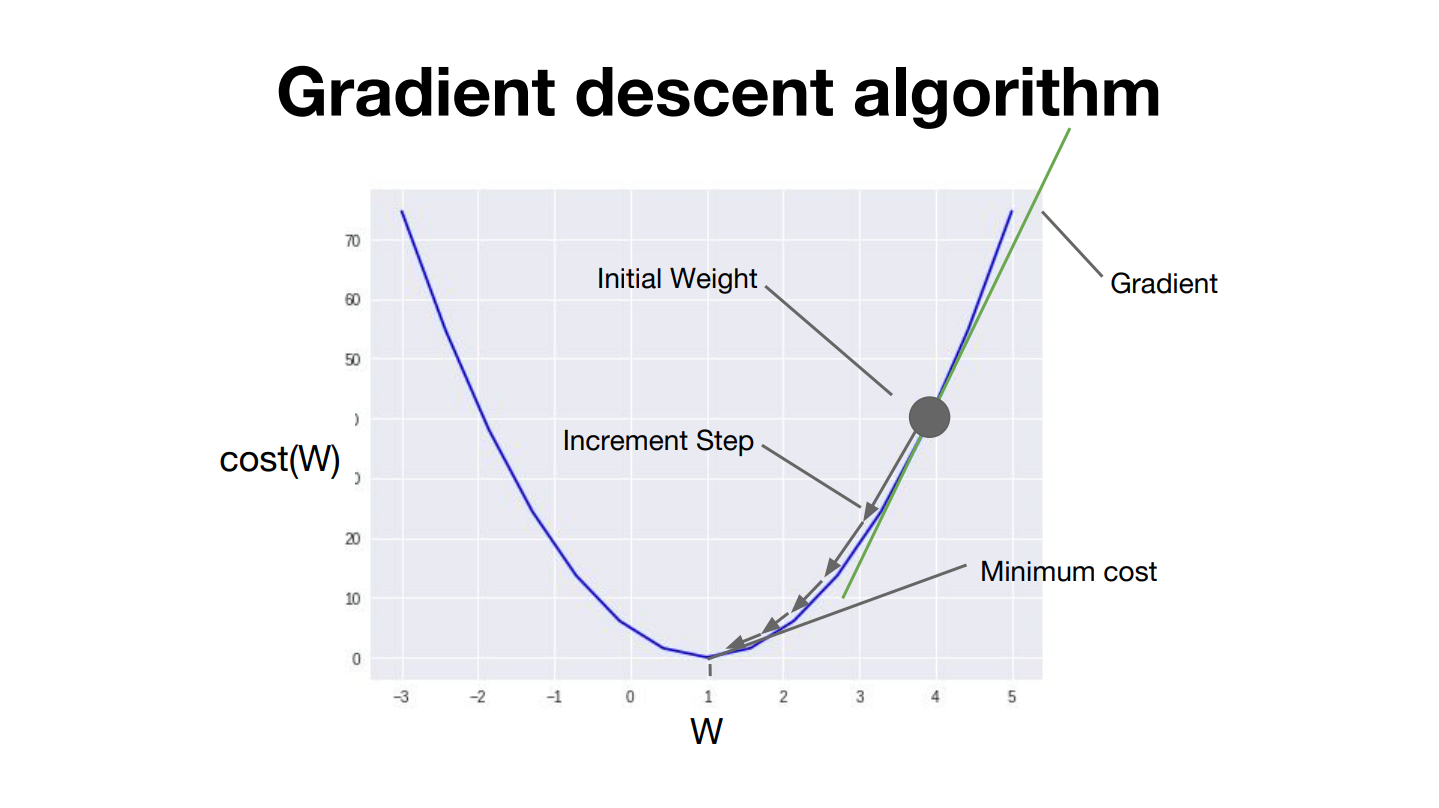

### Formal definition

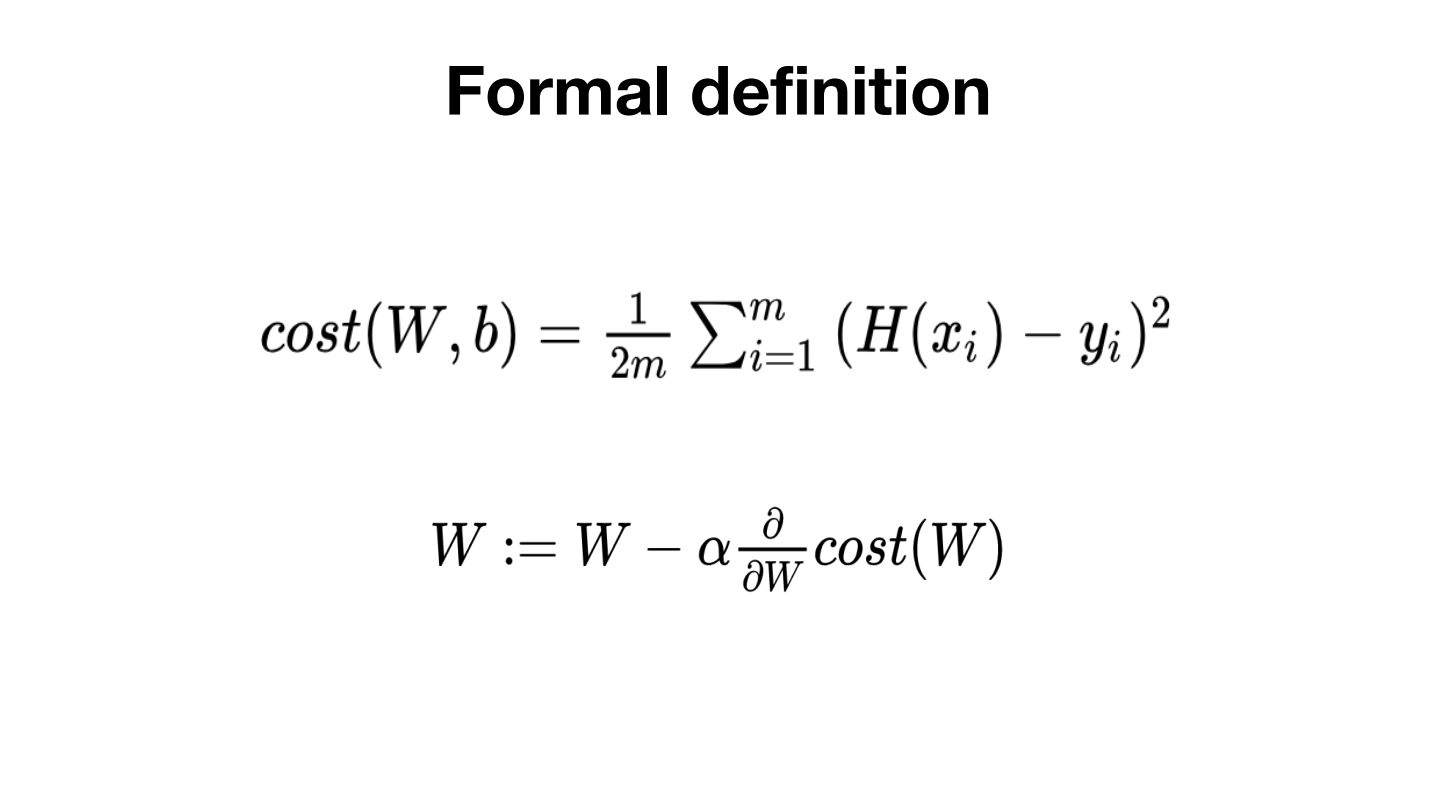

### Cost function in pure Python

In [12]:
import numpy as np
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    c = 0
    for i in range(len(X)):
        c += (W*X[i]-Y[i])**2
    return c/len(X)

for feed_W in np.linspace(-3,5,num=15):
    curr_cost = cost_func(feed_W,X,Y)
    print('{:6.3f}|{:10.5f}'.format(feed_W,curr_cost))

-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


### Cost function in TensorFlow

In [13]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W,X,Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis-Y))

W_values = np.linspace(-3,5,num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W,X,Y)
    cost_values.append(curr_cost)
    print('{:6.3f}|{:10.5f}'.format(feed_W,curr_cost))

-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


### Gradient descent

In [14]:
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046
